In [2]:
!pip install umap-learn
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


In [3]:
# Dimensionality Reduction on MNIST Digits Dataset
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
import umap
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
# Function to visualize 2D data
def plot_2d(data, labels, title="2D Visualization", cmap='Spectral'):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [7]:
# Load the MNIST Digits Dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

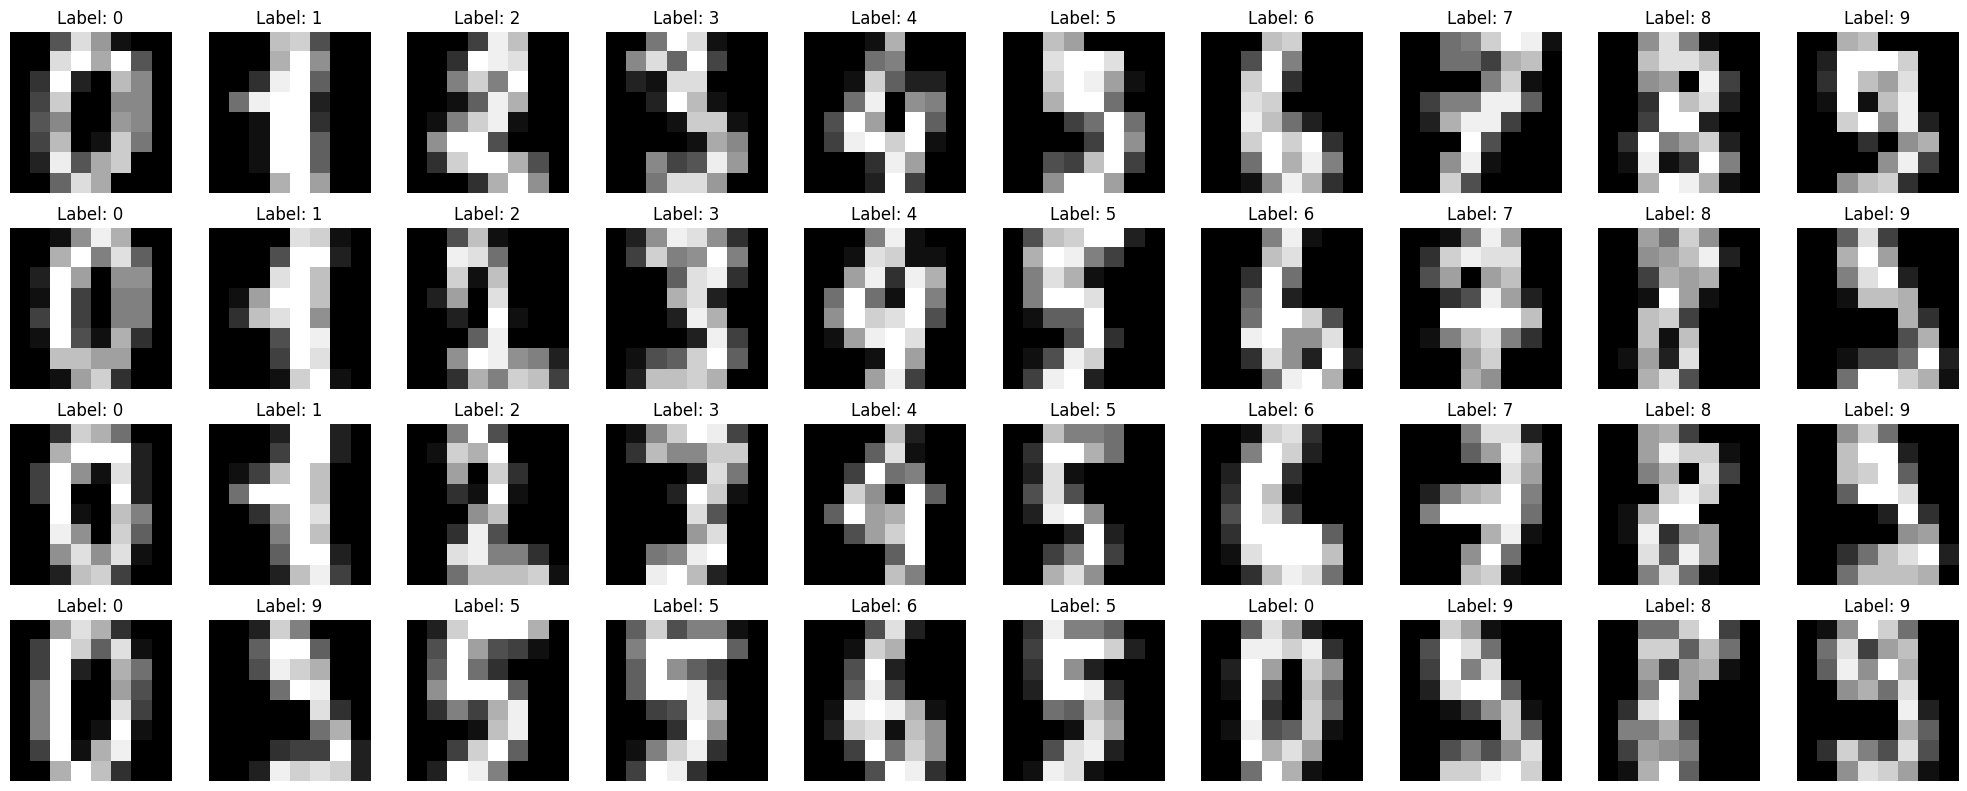

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

# Function to display a grid of digit images
def plot_digits_images(images, labels, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(1, n_rows * n_cols + 1):
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(images[i - 1], cmap='gray')
        plt.title(f"Label: {labels[i - 1]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 40 digit images
plot_digits_images(digits.images, digits.target, n_rows=4, n_cols=10)


In [8]:
# Standardize the data
scaler = StandardScaler()
X_digits_std = scaler.fit_transform(X_digits)

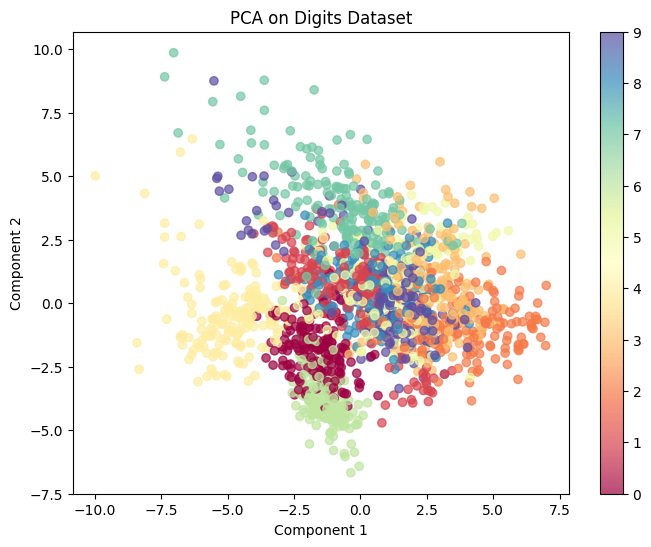

In [9]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits_std)
plot_2d(X_pca, y_digits, "PCA on Digits Dataset")

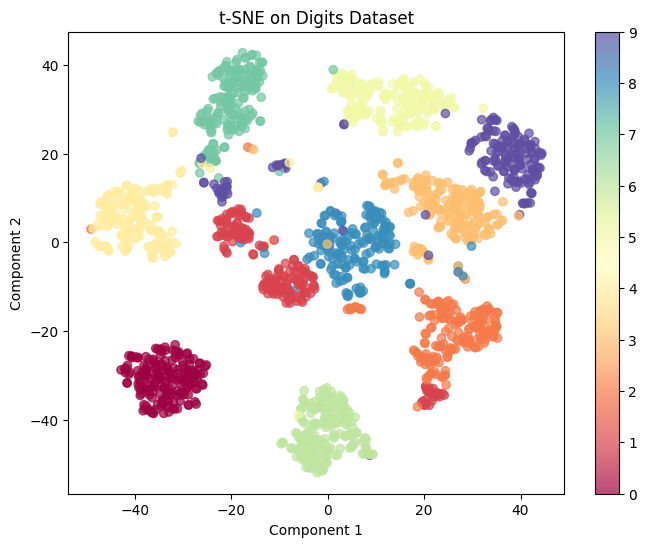

In [10]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_digits_std)
plot_2d(X_tsne, y_digits, "t-SNE on Digits Dataset")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


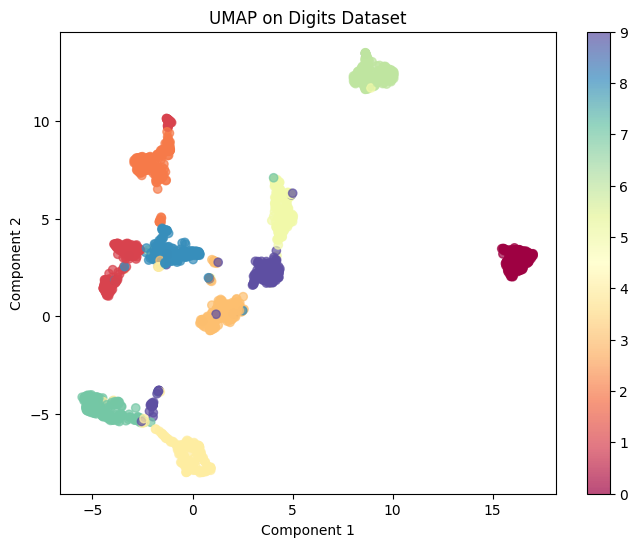

In [11]:
# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_digits_std)
plot_2d(X_umap, y_digits, "UMAP on Digits Dataset")

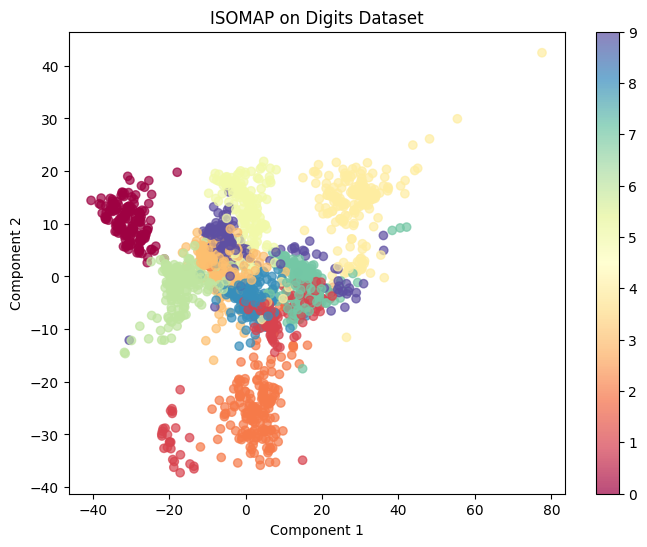

In [12]:
# ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_digits_std)
plot_2d(X_isomap, y_digits, "ISOMAP on Digits Dataset")

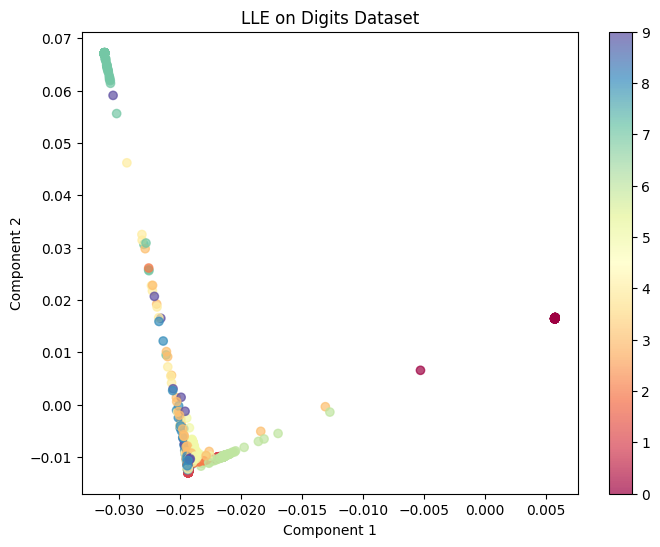

In [13]:
# Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_digits_std)
plot_2d(X_lle, y_digits, "LLE on Digits Dataset")

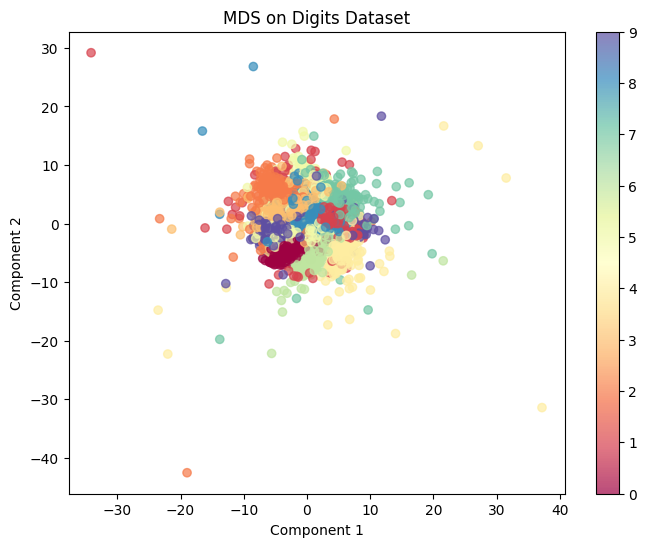

In [14]:
# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_digits_std)
plot_2d(X_mds, y_digits, "MDS on Digits Dataset")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


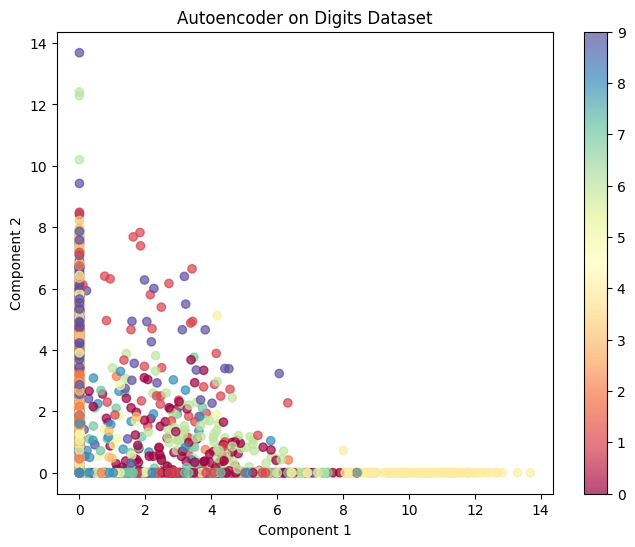

In [16]:
# Autoencoder
input_dim = X_digits.shape[1]
encoding_dim = 2
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_digits_std, X_digits_std, epochs=50, batch_size=256, verbose=0)

X_autoencoder = encoder.predict(X_digits_std)
plot_2d(X_autoencoder, y_digits, "Autoencoder on Digits Dataset")

Applying Randomized PCA...


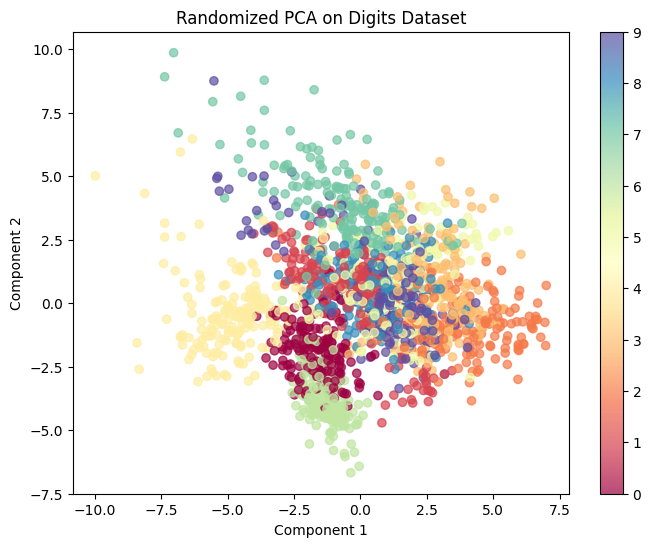

In [17]:
# Randomized PCA
print("Applying Randomized PCA...")
pca_random = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_random_pca = pca_random.fit_transform(X_digits_std)
plot_2d(X_random_pca, y_digits, title="Randomized PCA on Digits Dataset")


Applying Kernel PCA...


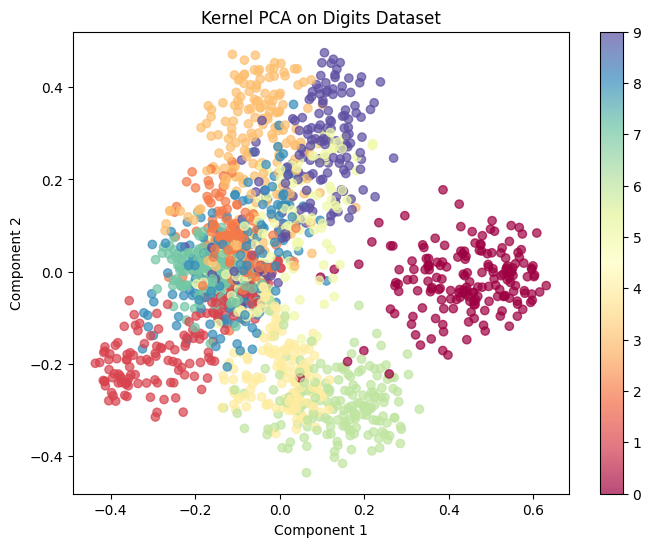

In [19]:
# Kernel PCA
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
print("Applying Kernel PCA...")
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, random_state=42)
X_kernel_pca = kernel_pca.fit_transform(X_digits_std)
plot_2d(X_kernel_pca, y_digits, title="Kernel PCA on Digits Dataset")

Applying Incremental PCA...


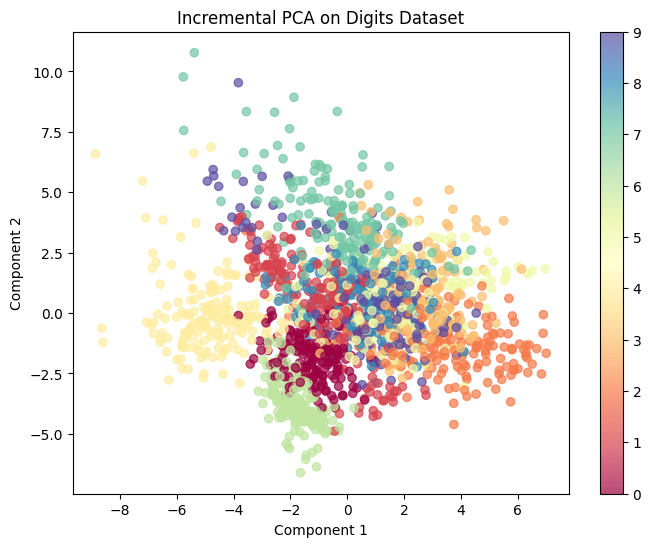

In [20]:
# Incremental PCA
print("Applying Incremental PCA...")
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_digits_std)
plot_2d(X_incremental_pca, y_digits, title="Incremental PCA on Digits Dataset")

Applying Factor Analysis...


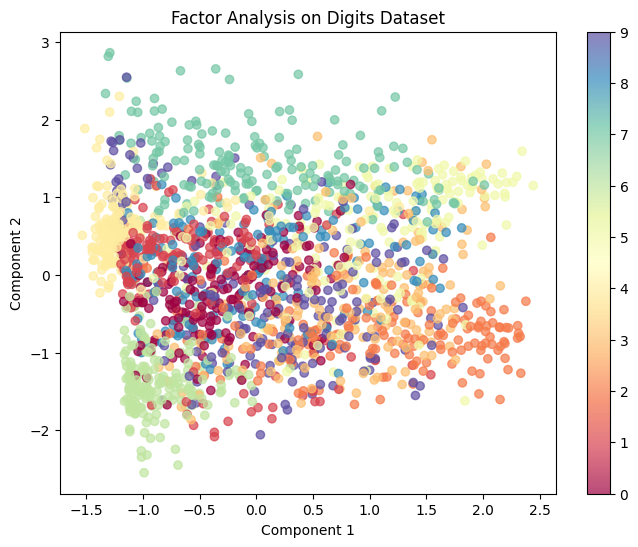

In [21]:
# Factor Analysis
print("Applying Factor Analysis...")
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X_digits_std)
plot_2d(X_fa, y_digits, title="Factor Analysis on Digits Dataset")